In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['MMM_Blender_data_2 (3).csv']), header = 0, sep = ",")

#df = pd.read_excel(r'C:\Users\kamal\Desktop\860\MMA860_Exam_Data_2024S.xlsx',sheet_name= 0)
df.head()

Saving MMM_Blender_data_2.csv to MMM_Blender_data_2 (3).csv


,Date,Sales,TV_ads,online_ads,Print_ads,Price
0,8-Jan,6237000,181223,12153,24987,135.0
1,8-Feb,6115500,179104,57353,17574,135.0
2,8-Mar,10577250,222756,146794,16016,135.0
3,8-Apr,13473000,188267,376459,29690,135.0
4,8-May,6258525,210038,21298,17607,136.5


In [ ]:
#we check data types of all variables, make sure all correct. We see all are digits except Month
df.dtypes

Date           object
Sales           int64
TV_ads          int64
online_ads      int64
Print_ads       int64
Price         float64
dtype: object

In [ ]:
#here we can see outliers. Seems none
df.describe()

,Sales,TV_ads,online_ads,Print_ads,Price
count,1.500000e+02,150.000000,150.000000,150.000000,150.000000
mean,7.387596e+06,200172.706667,123295.740000,19780.466667,158.150000
std,2.794341e+06,9486.438389,88241.436455,4875.111878,13.732799
min,7.854000e+05,176450.000000,876.000000,4717.000000,135.000000
25%,5.835769e+06,193755.250000,54933.750000,16695.750000,145.875000
50%,7.635600e+06,199504.000000,104538.500000,19926.500000,158.250000
75%,9.482625e+06,206391.500000,172074.250000,22933.500000,169.500000
max,1.380225e+07,222756.000000,442145.000000,32795.000000,180.000000


In [ ]:
#check missing data. None
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        150 non-null    object 
 1   Sales       150 non-null    int64  
 2   TV_ads      150 non-null    int64  
 3   online_ads  150 non-null    int64  
 4   Print_ads   150 non-null    int64  
 5   Price       150 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 7.2+ KB


In [ ]:
df['log_sales'] = np.log(df['Sales'])
df['log_tv'] = np.log(df['TV_ads'])
df['log_online'] = np.log(df['online_ads'])
df['log_print'] = np.log(df['Print_ads'])
df['log_price'] = np.log(df['Price'])

df.head()

,Date,Sales,TV_ads,online_ads,Print_ads,Price,log_sales,log_tv,log_online,log_print,log_price
0,8-Jan,6237000,181223,12153,24987,135.0,15.646010,12.107484,9.405331,10.126111,4.905275
1,8-Feb,6115500,179104,57353,17574,135.0,15.626337,12.095722,10.956980,9.774176,4.905275
2,8-Mar,10577250,222756,146794,16016,135.0,16.174216,12.313832,11.896786,9.681344,4.905275
3,8-Apr,13473000,188267,376459,29690,135.0,16.416198,12.145616,12.838564,10.298566,4.905275
4,8-May,6258525,210038,21298,17607,136.5,15.649455,12.255044,9.966368,9.776052,4.916325


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#we take all varibles and build first regresion model
model = ols('Sales ~ TV_ads  + online_ads + Print_ads  + Price',df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     418.7
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           1.51e-78
Time:                        20:54:13   Log-Likelihood:                -2249.1
No. Observations:                 150   AIC:                             4508.
Df Residuals:                     145   BIC:                             4523.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.934e+06    1.7e+06      1.136      0.2

In [ ]:
y = df['Sales']
X = df.drop(columns = ['Sales','Date'])

In [ ]:
# For "apples-to-apples" comparisons, set a starting value ("seed") for the random number generator
np.random.seed(77300)
from sklearn.model_selection import train_test_split
# split the data randomly into 80% train and 20% test samples
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.20)
# IMPORTANT: these samples are stratified, i.e., the proportion of retained and not-retained customers is the same in both

# Lets check the results
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(120, 8)
(30, 8)
(120,)
(30,)


In [ ]:
reg = LinearRegression().fit(train_X, train_y)

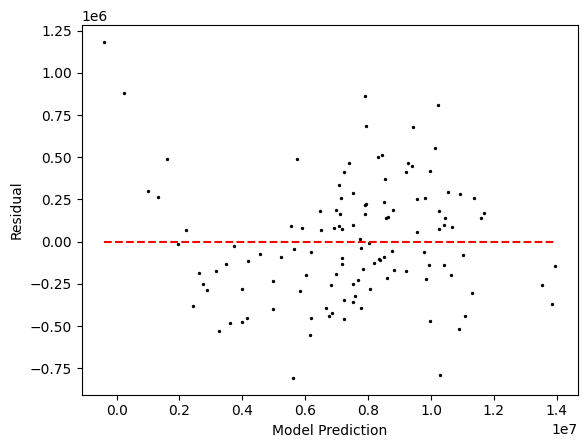

In [ ]:
predicted_y = reg.predict(train_X)
residuals = train_y - predicted_y

import matplotlib.pyplot as plt
plt.scatter(predicted_y,residuals,s=2,c='black')

plt.hlines(0,min(predicted_y),max(predicted_y),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

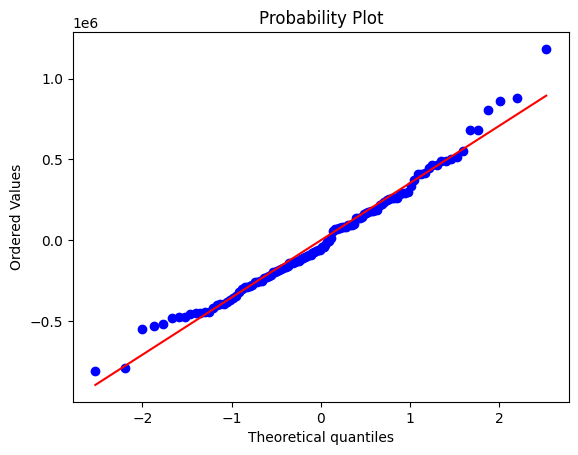

In [ ]:
import scipy.stats as stats

fig = plt.figure()
ax = fig.add_subplot(111)

stats.probplot(residuals,dist='norm',plot=ax)
plt.show()

above we can see a bit of a problem as the blue line should be alligned with the red one.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(residuals.reshape(-1,1))
norm_residuals = scaler.transform(residuals.reshape(-1,1))

plt.scatter(predicted_y,np.sqrt(np.abs(norm_residuals)),c='black',s=2)
plt.xlabel("Fitted Values")
plt.ylabel("Root of standardized residual")
plt.show()

AttributeError: ignored

no heteroskedasticity above as we do not see any cone shape

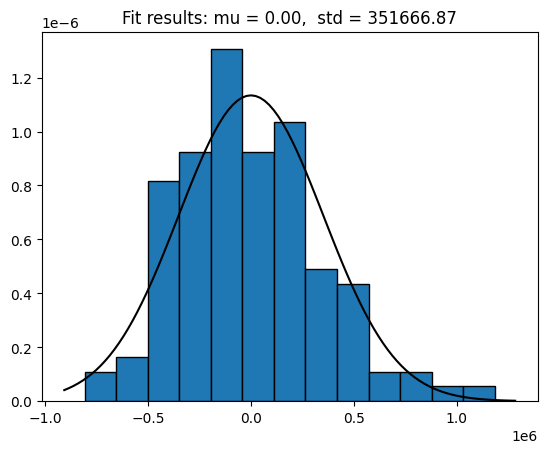

In [ ]:
from scipy.stats import norm

mean, std = norm.fit(residuals)

# Plot the histogram.
plt.hist(residuals, bins=13, edgecolor='black', density=True)

# Generate a PDF based on the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, color='black')
title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

plt.show()

seems that errors are around 0

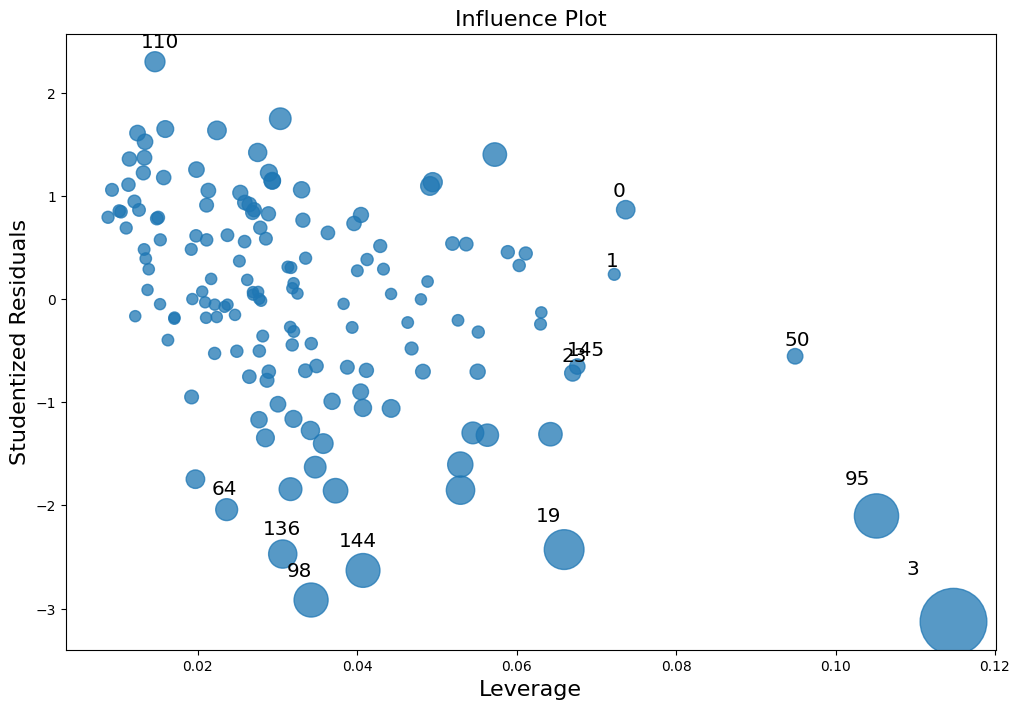

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp = het_breuschpagan(model.resid,model.model.exog)
measures = ('LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value')
print(dict(zip(measures,bp)))

{'LM Statistic': 4.319787405686087, 'LM-Test p-value': 0.3644538620982436, 'F-Statistic': 1.0749043447114826, 'F-Test p-value': 0.3711826212981401}


no heteroscedasticity as p-value is high, we cannot reject H0 which says there is homoscedasticity

In [ ]:
from sklearn.metrics import mean_squared_error
y_predicted = reg.predict(test_X)
rms = mean_squared_error(test_y, y_predicted, squared=False)
rms

419475.33067187545

MODEL #2

In [ ]:
model2 = ols('log_sales ~ TV_ads  + online_ads + Print_ads  + Price',df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     97.42
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           4.41e-40
Time:                        21:21:47   Log-Likelihood:                -18.821
No. Observations:                 150   AIC:                             47.64
Df Residuals:                     145   BIC:                             62.69
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.1227      0.594     25.455      0.0

In [ ]:
y2 = df['log_sales']
X2 = df.drop(columns = ['log_sales','Date'])

In [ ]:
np.random.seed(77300)
from sklearn.model_selection import train_test_split
# split the data randomly into 80% train and 20% test samples
train_X, test_X, train_y, test_y = train_test_split(X2,y2, test_size = 0.20)
# IMPORTANT: these samples are stratified, i.e., the proportion of retained and not-retained customers is the same in both

# Lets check the results
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(120, 8)
(30, 8)
(120,)
(30,)


In [ ]:
reg2 = LinearRegression().fit(train_X, train_y)

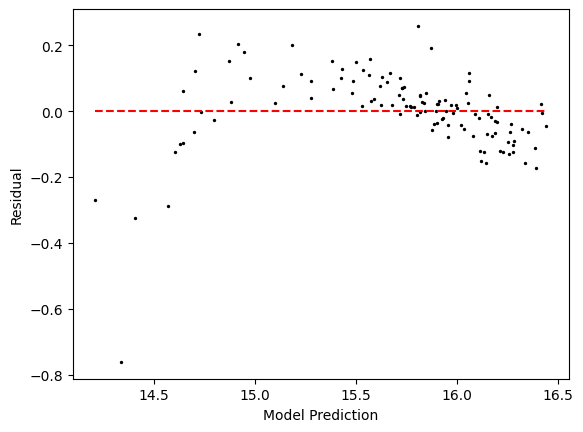

In [ ]:
predicted_y = reg2.predict(train_X)
residuals = train_y - predicted_y

import matplotlib.pyplot as plt
plt.scatter(predicted_y,residuals,s=2,c='black')

plt.hlines(0,min(predicted_y),max(predicted_y),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

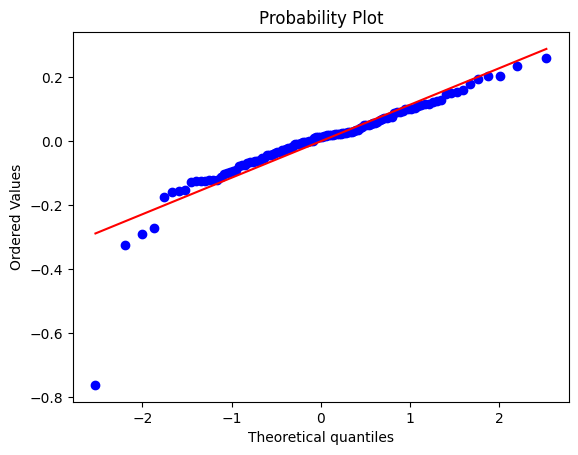

In [ ]:
import scipy.stats as stats

fig = plt.figure()
ax = fig.add_subplot(111)

stats.probplot(residuals,dist='norm',plot=ax)
plt.show()

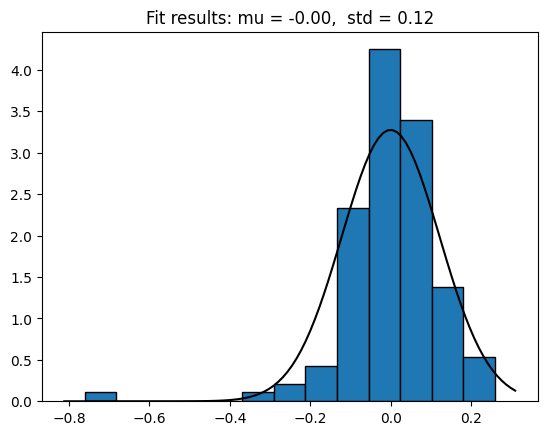

In [ ]:
from scipy.stats import norm

mean, std = norm.fit(residuals)

# Plot the histogram.
plt.hist(residuals, bins=13, edgecolor='black', density=True)

# Generate a PDF based on the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, color='black')
title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

plt.show()

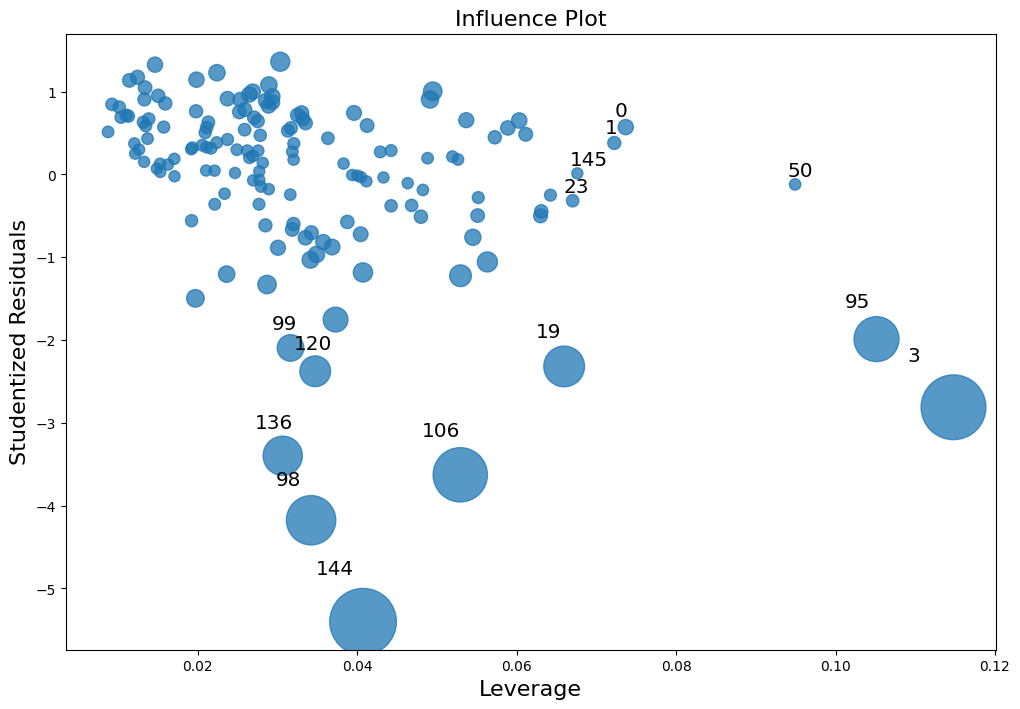

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model2
                                 , ax=ax, criterion="cooks")
plt.show()

In [ ]:
y_predicted2 = reg2.predict(test_X)
y_predicted2 = np.exp(y_predicted2)
test_y = np.exp(test_y)
rms = mean_squared_error(test_y, y_predicted2, squared=False)
rms

746378.3241911225

MODEL #3   LOG _  LOG


In [ ]:
model3 = ols('log_sales ~ log_tv  + log_online + log_print + log_price',df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     208.3
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           4.84e-59
Time:                        21:41:37   Log-Likelihood:                 26.499
No. Observations:                 150   AIC:                            -43.00
Df Residuals:                     145   BIC:                            -27.95
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0456      4.666     -1.296      0.1

In [ ]:
y3 = df['log_sales']
X3 = df.drop(columns = ['log_sales','Date', 'Sales'])

In [ ]:
np.random.seed(77300)
from sklearn.model_selection import train_test_split
# split the data randomly into 80% train and 20% test samples
train_X, test_X, train_y, test_y = train_test_split(X3,y3, test_size = 0.20)
# IMPORTANT: these samples are stratified, i.e., the proportion of retained and not-retained customers is the same in both

# Lets check the results
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(120, 8)
(30, 8)
(120,)
(30,)


In [ ]:
reg3 = LinearRegression().fit(train_X, train_y)

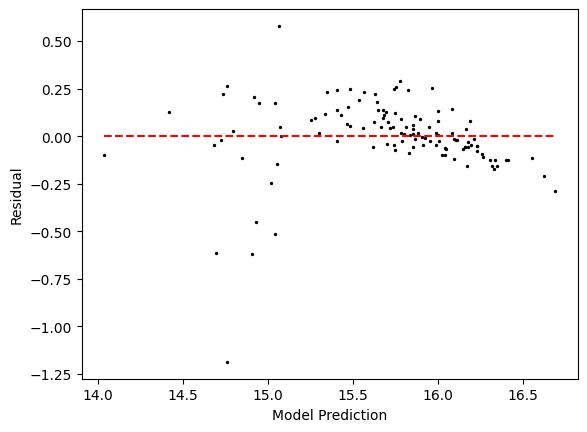

In [ ]:
predicted_y = reg3.predict(train_X)
residuals = train_y - predicted_y

import matplotlib.pyplot as plt
plt.scatter(predicted_y,residuals,s=2,c='black')

plt.hlines(0,min(predicted_y),max(predicted_y),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

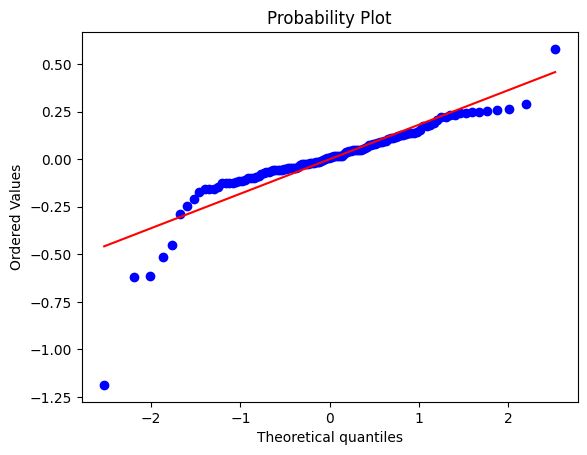

In [ ]:
import scipy.stats as stats

fig = plt.figure()
ax = fig.add_subplot(111)

stats.probplot(residuals,dist='norm',plot=ax)
plt.show()

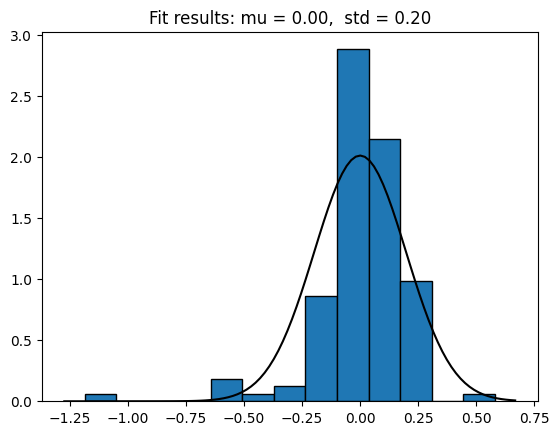

In [ ]:
from scipy.stats import norm

mean, std = norm.fit(residuals)

# Plot the histogram.
plt.hist(residuals, bins=13, edgecolor='black', density=True)

# Generate a PDF based on the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, color='black')
title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

plt.show()

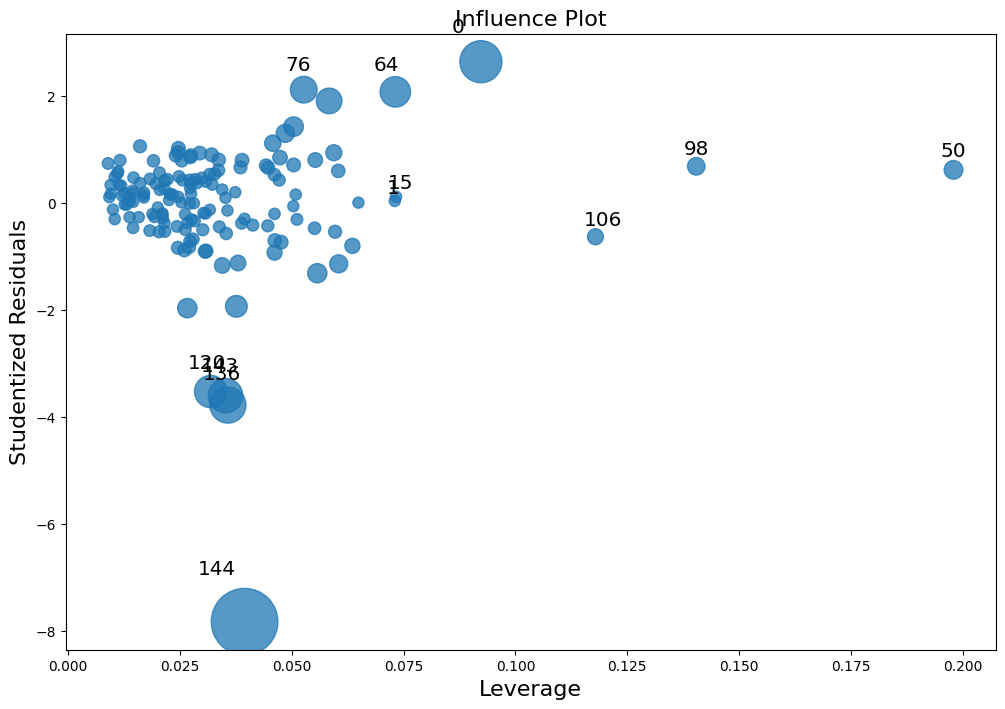

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model3
                                 , ax=ax, criterion="cooks")
plt.show()

In [ ]:
y_predicted3 = reg3.predict(test_X)
y_predicted3 = np.exp(y_predicted3)
test_y = np.exp(test_y)

rms = mean_squared_error(test_y, y_predicted3, squared=False)
rms

1039748.8575185634

MODEL #4

In [ ]:
df['Sales']=df['Sales']/1000
df.head()

,Date,Sales,TV_ads,online_ads,Print_ads,Price,log_sales,log_tv,log_online,log_print,log_price
0,8-Jan,6237.000,181223,12153,24987,135.0,15.646010,12.107484,9.405331,10.126111,4.905275
1,8-Feb,6115.500,179104,57353,17574,135.0,15.626337,12.095722,10.956980,9.774176,4.905275
2,8-Mar,10577.250,222756,146794,16016,135.0,16.174216,12.313832,11.896786,9.681344,4.905275
3,8-Apr,13473.000,188267,376459,29690,135.0,16.416198,12.145616,12.838564,10.298566,4.905275
4,8-May,6258.525,210038,21298,17607,136.5,15.649455,12.255044,9.966368,9.776052,4.916325


In [ ]:
model4 = ols('Sales ~ TV_ads  + online_ads + Print_ads  + Price',df).fit()
print(model4.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     418.7
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           1.51e-78
Time:                        22:27:44   Log-Likelihood:                -1212.9
No. Observations:                 150   AIC:                             2436.
Df Residuals:                     145   BIC:                             2451.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1933.8517   1702.574      1.136      0.2

In [ ]:
y4 = df['Sales']
X4 = df.drop(columns = ['log_sales','Date', 'Sales'])

In [ ]:
np.random.seed(77300)
from sklearn.model_selection import train_test_split
# split the data randomly into 80% train and 20% test samples
train_X, test_X, train_y, test_y = train_test_split(X4,y4, test_size = 0.20)
# IMPORTANT: these samples are stratified, i.e., the proportion of retained and not-retained customers is the same in both

# Lets check the results
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(120, 8)
(30, 8)
(120,)
(30,)


In [ ]:
reg4 = LinearRegression().fit(train_X, train_y)

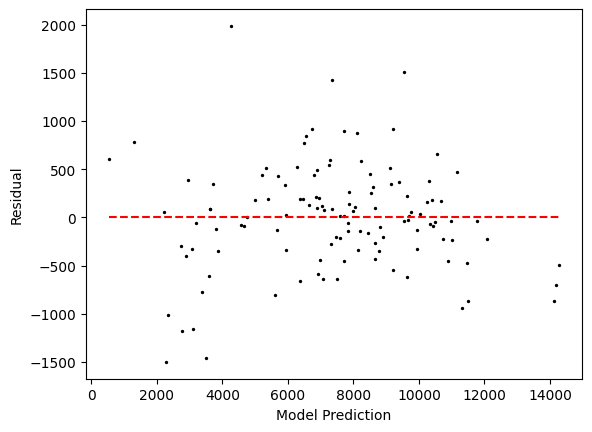

In [ ]:
predicted_y = reg4.predict(train_X)
residuals = train_y - predicted_y

import matplotlib.pyplot as plt
plt.scatter(predicted_y,residuals,s=2,c='black')

plt.hlines(0,min(predicted_y),max(predicted_y),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

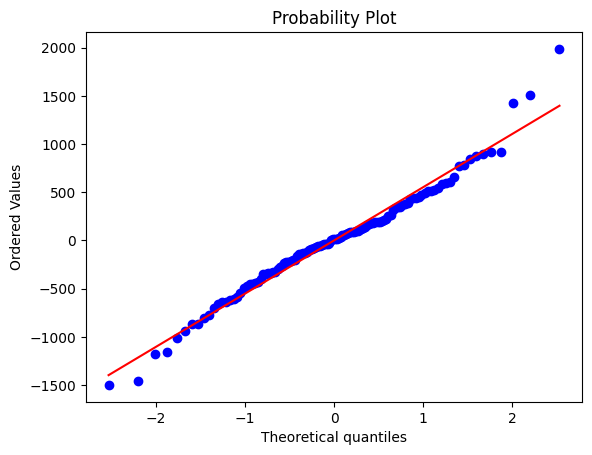

In [ ]:
import scipy.stats as stats

fig = plt.figure()
ax = fig.add_subplot(111)

stats.probplot(residuals,dist='norm',plot=ax)
plt.show()

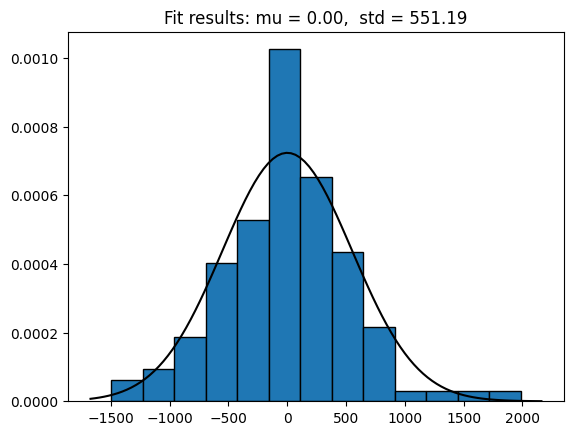

In [ ]:
from scipy.stats import norm

mean, std = norm.fit(residuals)

# Plot the histogram.
plt.hist(residuals, bins=13, edgecolor='black', density=True)

# Generate a PDF based on the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, color='black')
title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

plt.show()

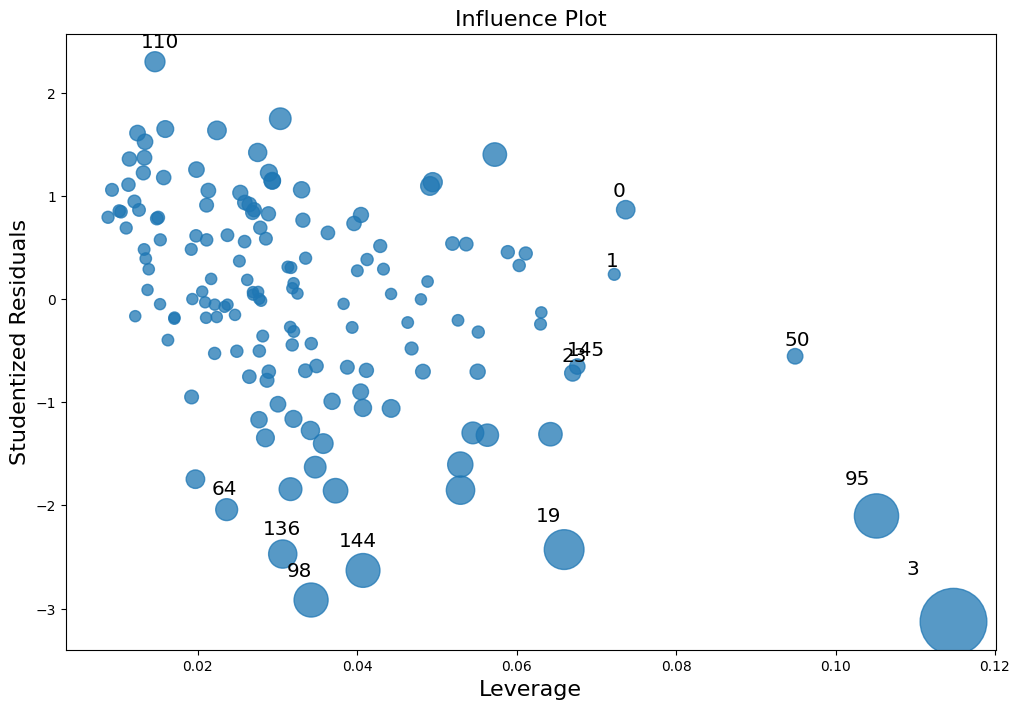

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model4
                                 , ax=ax, criterion="cooks")
plt.show()

In [ ]:
y_predicted7 = reg4.predict(test_X)*1000

rms = mean_squared_error(test_y*1000, y_predicted7, squared=False)
rms

567457.4476872003